<a href="https://colab.research.google.com/github/sab112/myfirstrepo/blob/master/mydecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#decision tree classifier is used when the data points are scattered and linear/logistic wont work as a line cant be drawn. it takes more two or more lines
#check the plt and decide on the algo

#To determine which order the features should be, like company,degree,job or degree,job,company, to form a decision tree
#look for low entropy, like in company cfeature once company- facebook has all more than 100k (6/0, i.e no ramdomness,so low entropy, so high information gain), 
#in degree 4 bachelor has more than 100? and other 4 bachelores has less (4/4 ramdomness,so high entropy,so low information gain). Choose company first for this eg.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [96]:
a=[['google','sales executive','bachelors',0],
['google','sales executive','masters',0],
['google','business manager','bachelors',1],
['google','business manager','masters',1],
['google','computer programmer','bachelors',0],
['google','computer programmer','masters',1],
['abc pharma','sales executive','masters',0],
['abc pharma','computer programmer','bachelors',0],
['abc pharma','business manager','bachelors',0],
['abc pharma','business manager','masters',1],
['facebook','sales executive','bachelors',1],
['facebook','sales executive','masters',1],
['facebook','business manager','bachelors',1],
['facebook','business manager','masters',1],
['facebook','computer programmer','bachelors',1],
['facebook','computer programmer','masters',1]]

In [97]:
df= pd.DataFrame(a,columns=('company','job','degree','salary_more_then_100k'))
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [98]:
inputs = df.drop('salary_more_then_100k',axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [99]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

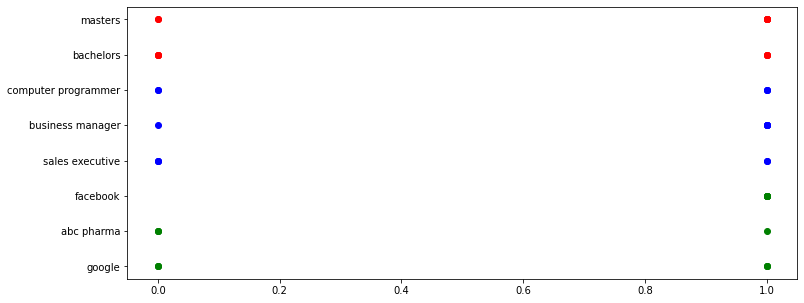

In [100]:
plt.figure(figsize=(12,5))
plt.scatter(target,inputs['company'],color='green')
plt.scatter(target,inputs['job'],color='blue')
plt.scatter(target,inputs['degree'],color='red')

In [101]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [102]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [103]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [104]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [105]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [106]:
model = DecisionTreeClassifier()

In [107]:
model.fit(inputs_n, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
model.score(inputs_n,target)

1.0

In [109]:
#Is salary of Google, Computer programmer, master degree > 100 k ?
model.predict([[2,1,1]])

array([1])

In [110]:
model.predict(inputs_n)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

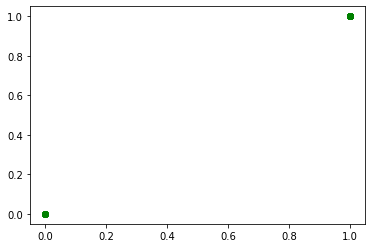

In [111]:
plt.scatter(model.predict(inputs_n),target,color='green')